In [1]:
import pandas as pd
import numpy as np

stocks = pd.read_csv("data/stocks_ti.csv")

import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from utils import prep_classifier_data, feature_type_map

fm = feature_type_map(stocks)
columns1 = list(set(fm["spy_returns"]))
# print(len(columns1))
columns2 = list(set(fm["returns"]))
# print(len(columns2))
columns3 = list(set(fm["returns"] + fm["sentiment"]))
# print(len(columns3))
columns4 = list(set(fm["returns"] + fm["technical"]))
# print(len(columns4))
columns5 = stocks.columns
# print(len(columns5))

# dictionary to store tuple of (pred, confusion_matrix, classifier) for each day, for each feature type, for each model
models_key = {
    "navie_bayes": {
        "spy_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_sentiment": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_technical": {1: None, 5: None, 13: None, 21: None},
        "all_features": {1: None, 5: None, 13: None, 21: None},
    },
    "logistic_regression": {
        "spy_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_sentiment": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_technical": {1: None, 5: None, 13: None, 21: None},
        "all_features": {1: None, 5: None, 13: None, 21: None},
    },
    "random_forest": {
        "spy_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_sentiment": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_technical": {1: None, 5: None, 13: None, 21: None},
        "all_features": {1: None, 5: None, 13: None, 21: None},
    },
    "xgboost": {
        "spy_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_sentiment": {1: None, 5: None, 13: None, 21: None},
        "sector_returns_technical": {1: None, 5: None, 13: None, 21: None},
        "all_features": {1: None, 5: None, 13: None, 21: None},
    },
}

# loop through each day and each feature type
for i, day_no in enumerate([1, 5, 13, 21]):
    for j, features in enumerate([columns1, columns2, columns3, columns4, columns5]):
        features_type = [
            "spy_returns",
            "sector_returns",
            "sector_returns_sentiment",
            "sector_returns_technical",
            "all_features",
        ][j]

        # prep data
        X_train, X_test, y_train, y_test = prep_classifier_data(
            stocks[features].copy(), day_no
        )

        ## models
        from utils import (
            naive_bayes_classifier,
            logistic_regression,
            random_forest_classifier,
            xgboost_classifier,
        )

        print(f"Naive Bayes Classifier on {day_no} day(s) with {features_type}...")
        models_key["logistic_regression"][features_type][day_no] = (
            naive_bayes_classifier(X_train, X_test, y_train, y_test)
        )

        # logistic regression
        print(f"Logistic Regression on {day_no} day(s) with {features_type}...")
        models_key["logistic_regression"][features_type][day_no] = logistic_regression(
            X_train, X_test, y_train, y_test
        )

        # random forest
        print(f"Random Forest on {day_no} day(s) with {features_type}...")
        models_key["random_forest"][features_type][day_no] = random_forest_classifier(
            X_train, X_test, y_train, y_test
        )

        # xgboost
        print(f"XGBoost on {day_no} day(s) with {features_type}...")
        models_key["xgboost"][features_type][day_no] = xgboost_classifier(
            X_train, X_test, y_train, y_test
        )

7
67
69
386
421
Naive Bayes Classifier on 1 day(s) with spy_returns...
Accuracy: 0.44800
Logistic Regression on 1 day(s) with spy_returns...
Accuracy: 0.58800
Random Forest on 1 day(s) with spy_returns...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy: 0.54800
XGBoost on 1 day(s) with spy_returns...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy: 0.52400
Naive Bayes Classifier on 1 day(s) with sector_returns...
Accuracy: 0.46400
Logistic Regression on 1 day(s) with sector_returns...
Accuracy: 0.58000
Random Forest on 1 day(s) with sector_returns...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy: 0.48000
XGBoost on 1 day(s) with sector_returns...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy: 0.48400
Naive Bayes Classifier on 1 day(s) with sector_returns_sentiment...
Accuracy: 0.46800
Logistic Regression on 1 day(s) with sector_returns_sentiment...
Accuracy: 0.57600
Random Forest on 1 da

KeyboardInterrupt: 

In [4]:
import pickle

with open("models_key.pkl", "wb") as file:
    pickle.dump(models_key, file)

In [5]:
# Open the pickle file and load the data
with open("models_key.pkl", "rb") as file:
    models_key = pickle.load(file)

# Now models_key is available as a dictionary
# print(models_key)

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


def plot_all_confusion_matrices(feature_types_dict, title):
    fig, axes = plt.subplots(5, 4, figsize=(15, 20))  # Adjust subplot grid if needed
    fig.suptitle(title, fontsize=16)

    # Iterate over the dictionary items
    for i, (feature_type, days_dict) in enumerate(feature_types_dict.items()):
        for j, (days, results) in enumerate(days_dict.items()):
            if results is not None:
                cm = results[
                    1
                ]  # Assuming results is a tuple and index 1 is the confusion matrix
                disp = ConfusionMatrixDisplay(
                    confusion_matrix=cm,
                    display_labels=["down", "up"],  # Custom labels for the classes
                )
                disp.plot(
                    ax=axes[i, j], cmap="Blues", values_format=".0f", colorbar=False
                )
                axes[i, j].set_title(
                    f"Feature type: {feature_type} \n Predicting {days} day(s) return",
                    fontsize=10,
                )

    # Adjust layout to make room for the title
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [7]:
# plot_all_confusion_matrices(models_key["logistic_regression"], "Logistic Regression")

In [8]:
# plot_all_confusion_matrices(models_key["random_forest"], "Random Forest")

In [9]:
# plot_all_confusion_matrices(models_key["xgboost"], "XGBoost")

In [10]:
from sklearn.metrics import roc_curve, auc

In [11]:
def plot_all_roc(feature_types_dict, title):
    fig, axes = plt.subplots(5, 4, figsize=(15, 20))  # Adjust subplot grid if needed
    fig.suptitle(title, fontsize=16)

    # Iterate over the dictionary items
    for i, (feature_type, days_dict) in enumerate(feature_types_dict.items()):
        for j, (days, results) in enumerate(days_dict.items()):
            if results is not None:
                y_test, y_prob = results[-1][0], results[-1][1]

                fpr, tpr, _ = roc_curve(y_test, y_prob)
                roc_auc = auc(fpr, tpr)

                axes[i, j].plot(
                    fpr,
                    tpr,
                    color="darkorange",
                    lw=2,
                    label="ROC curve (area = %0.2f)" % roc_auc,
                )
                axes[i, j].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
                axes[i, j].set_xlim([0.0, 1.0])
                axes[i, j].set_ylim([0.0, 1.05])
                axes[i, j].legend(loc="lower right")

                axes[i, j].set_title(
                    f"Feature type: {feature_type} \n Predicting {days} day(s) return",
                    fontsize=10,
                )

    # Adjust layout to make room for the title
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

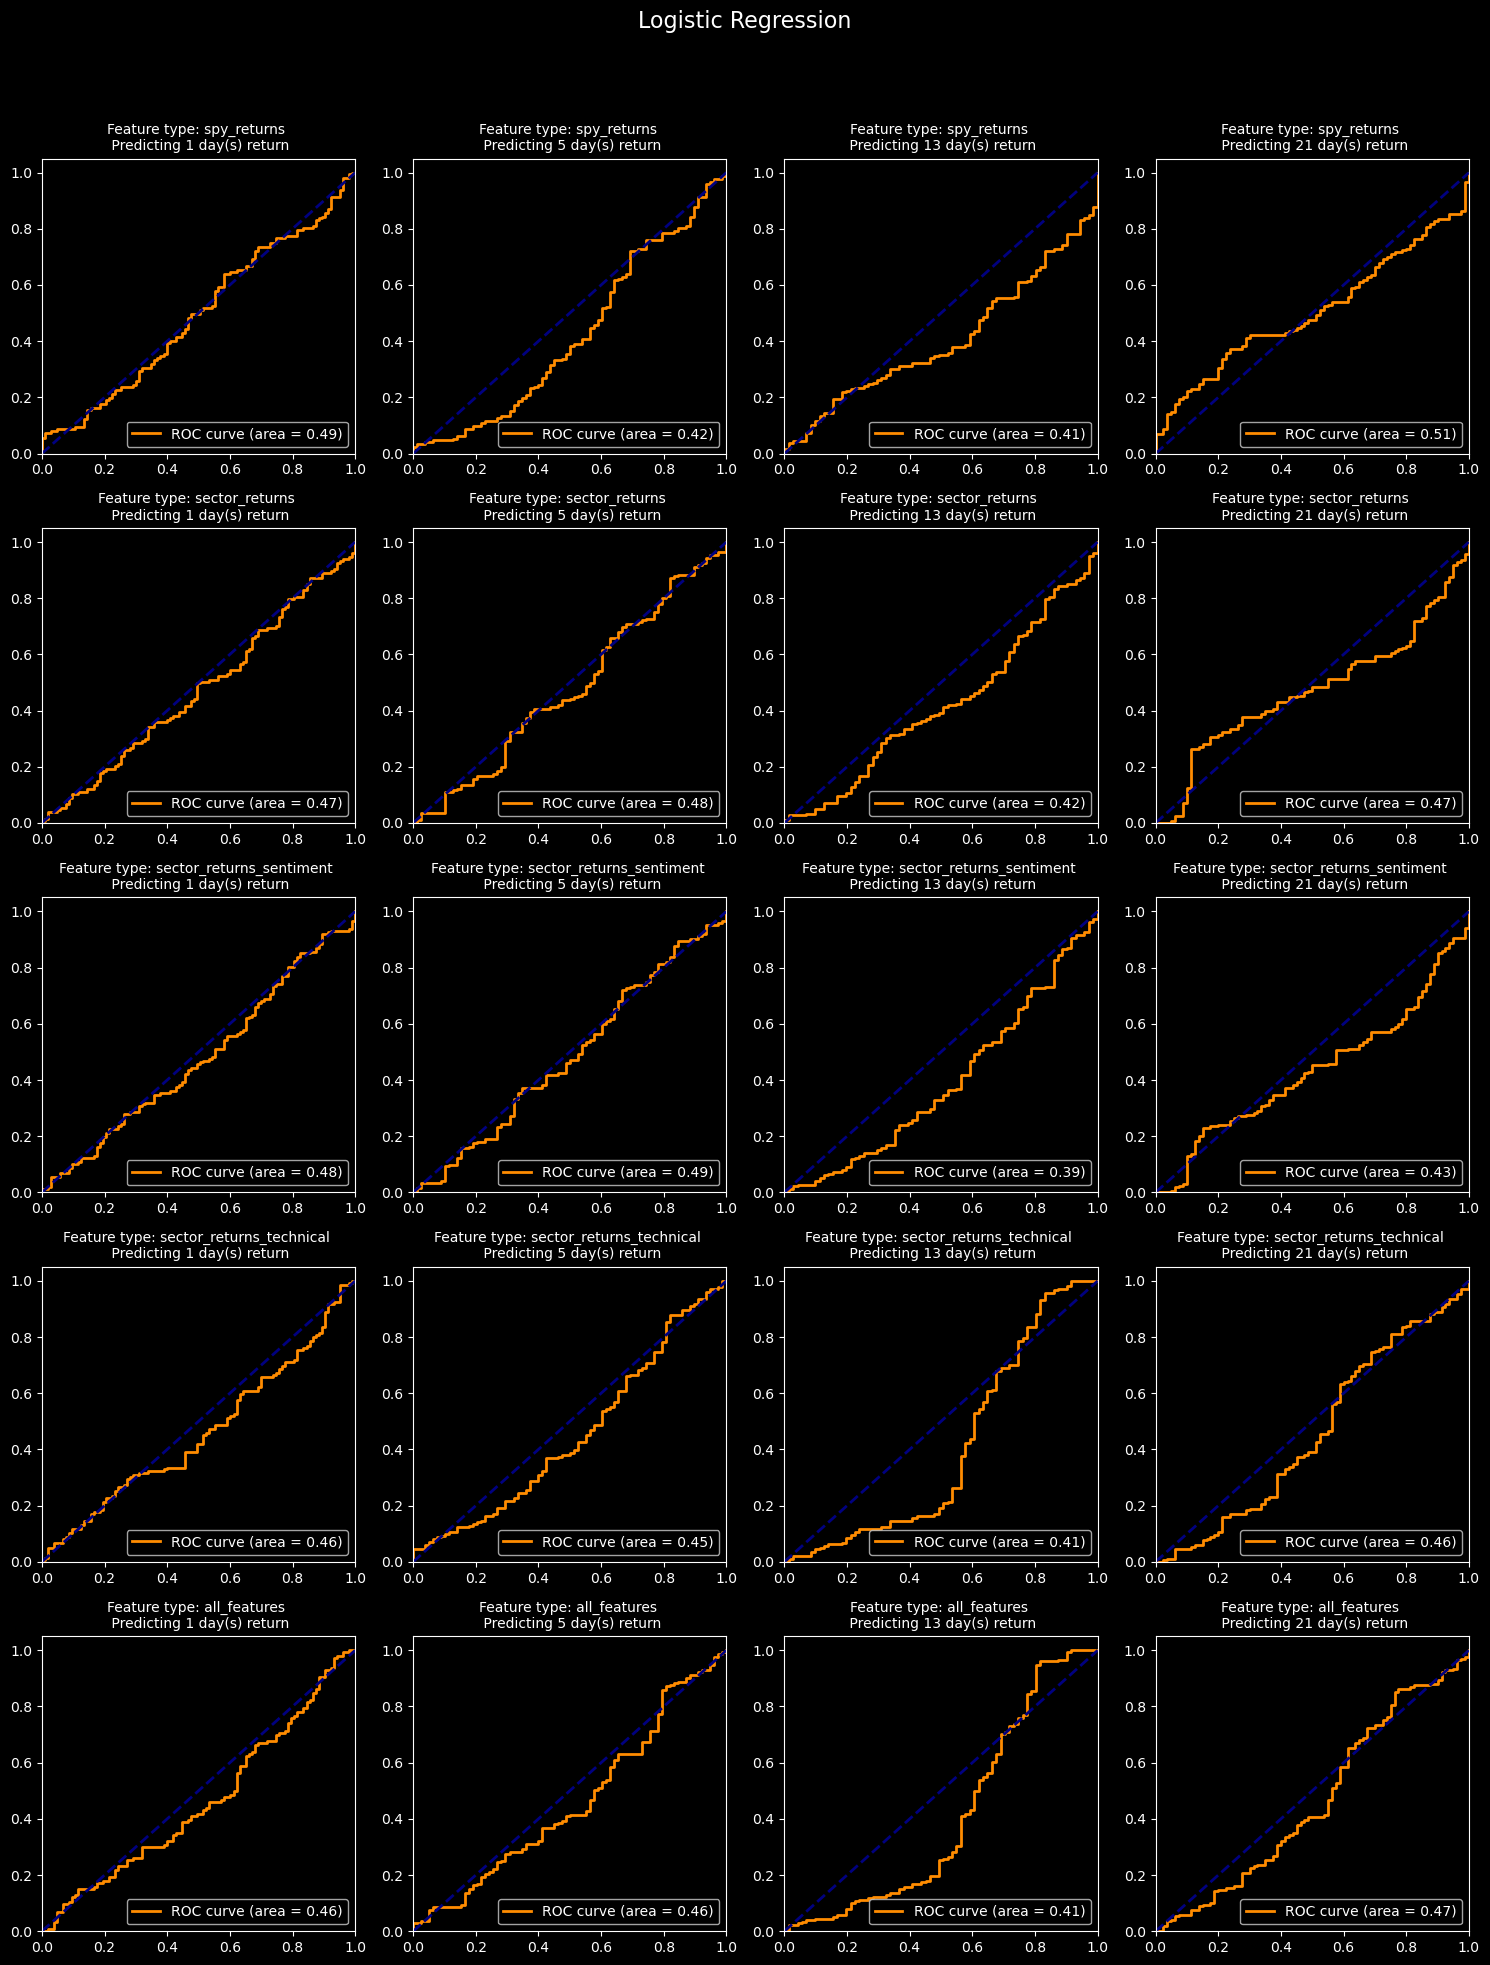

In [12]:
plot_all_roc(models_key["logistic_regression"], "Logistic Regression")

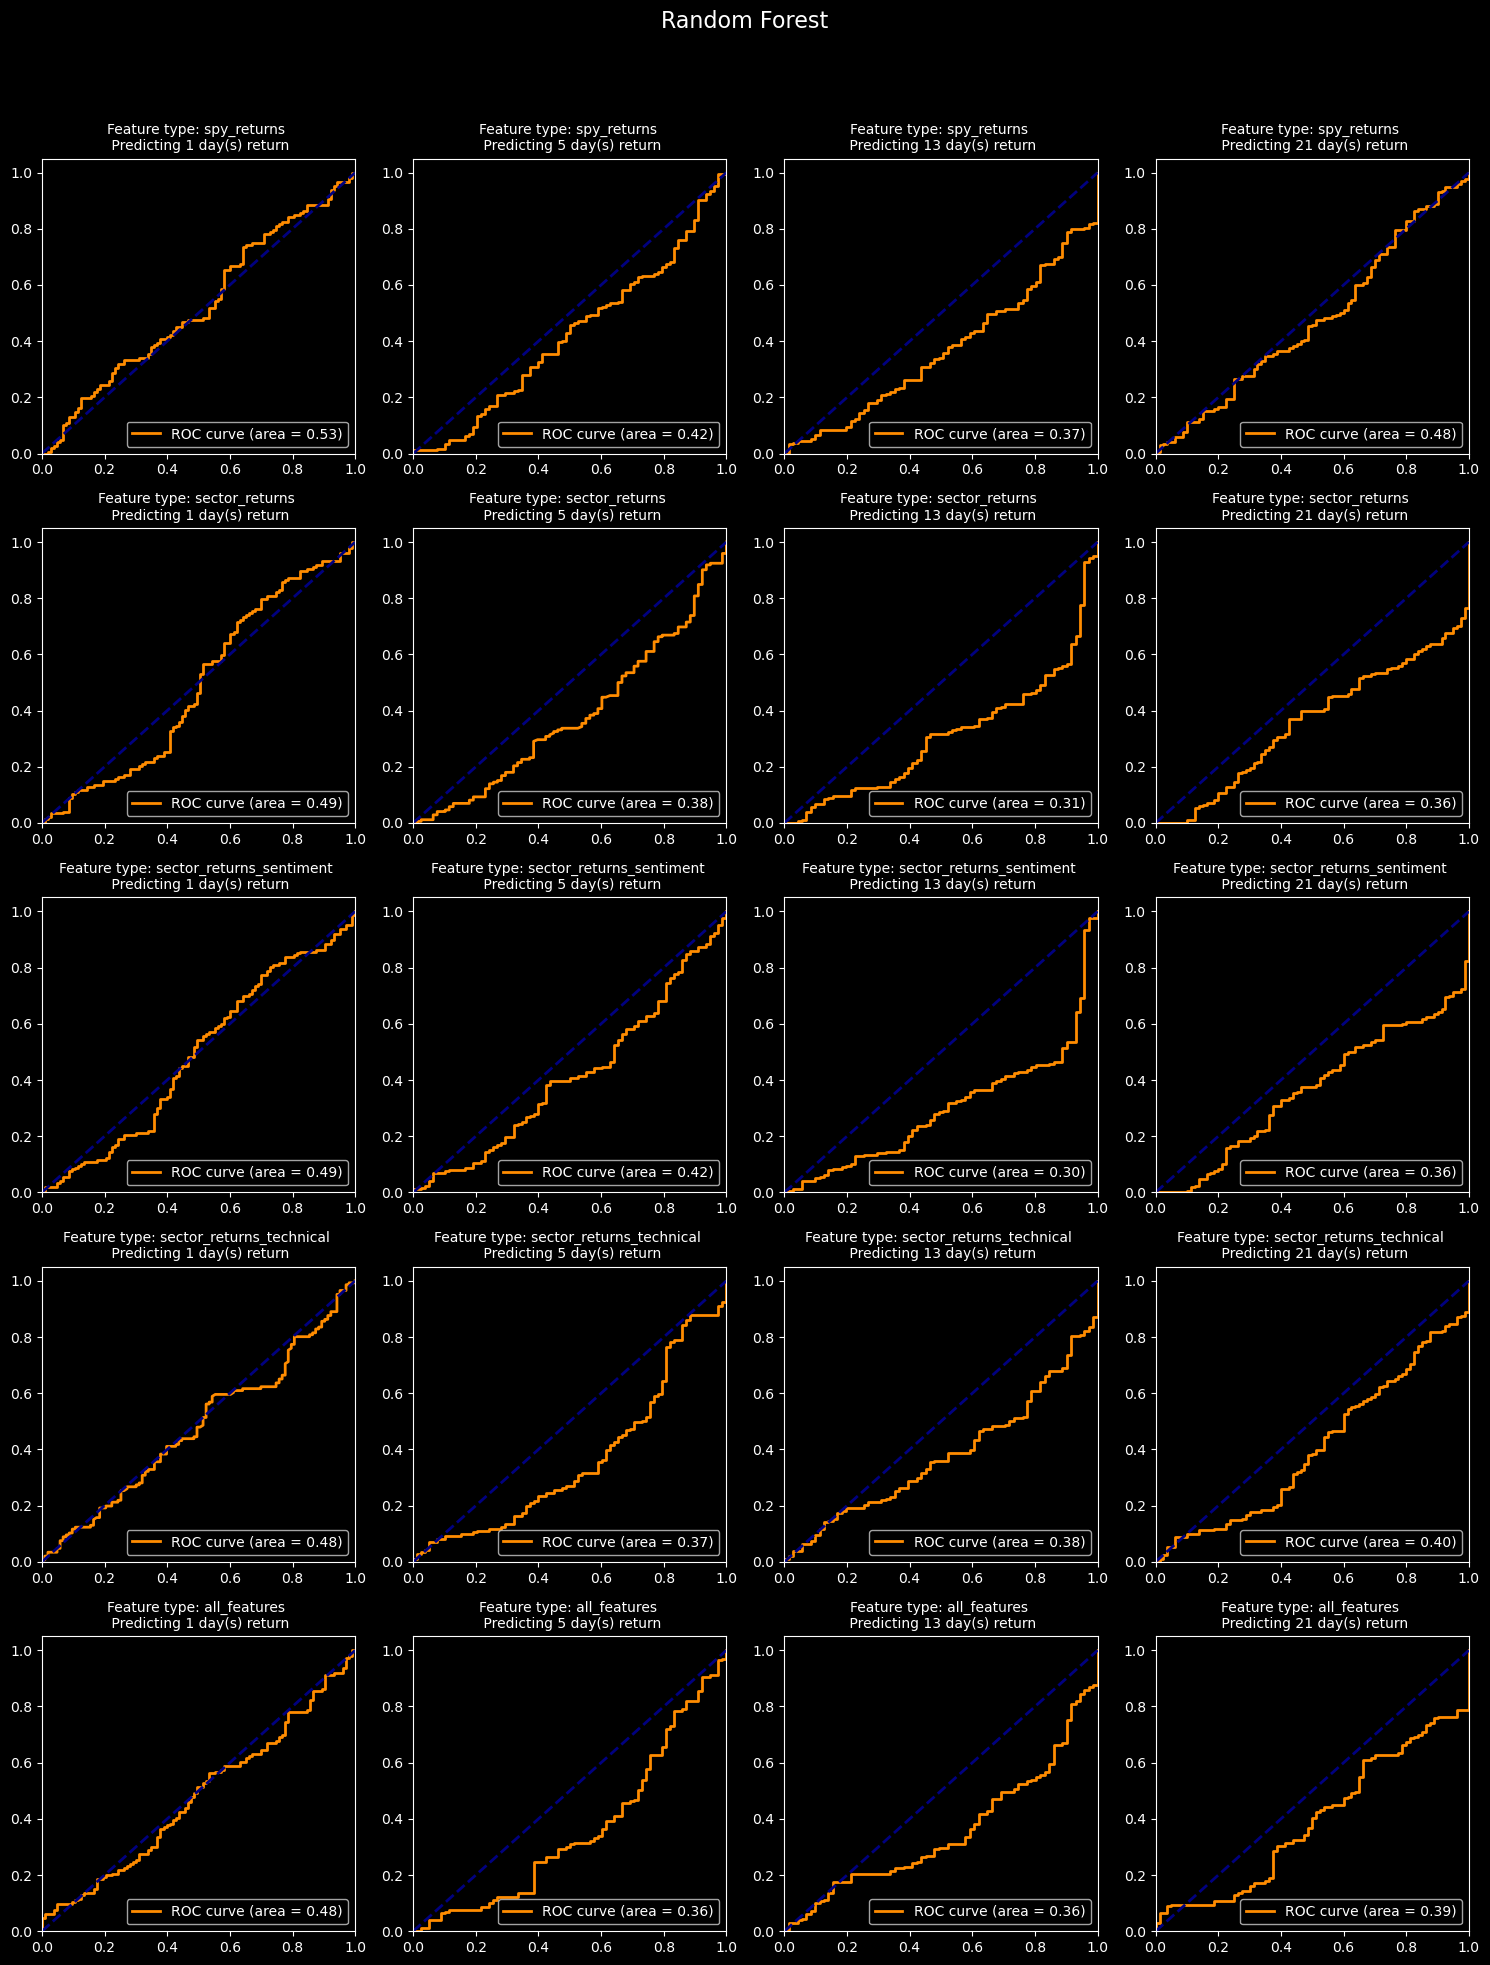

In [13]:
plot_all_roc(models_key["random_forest"], "Random Forest")

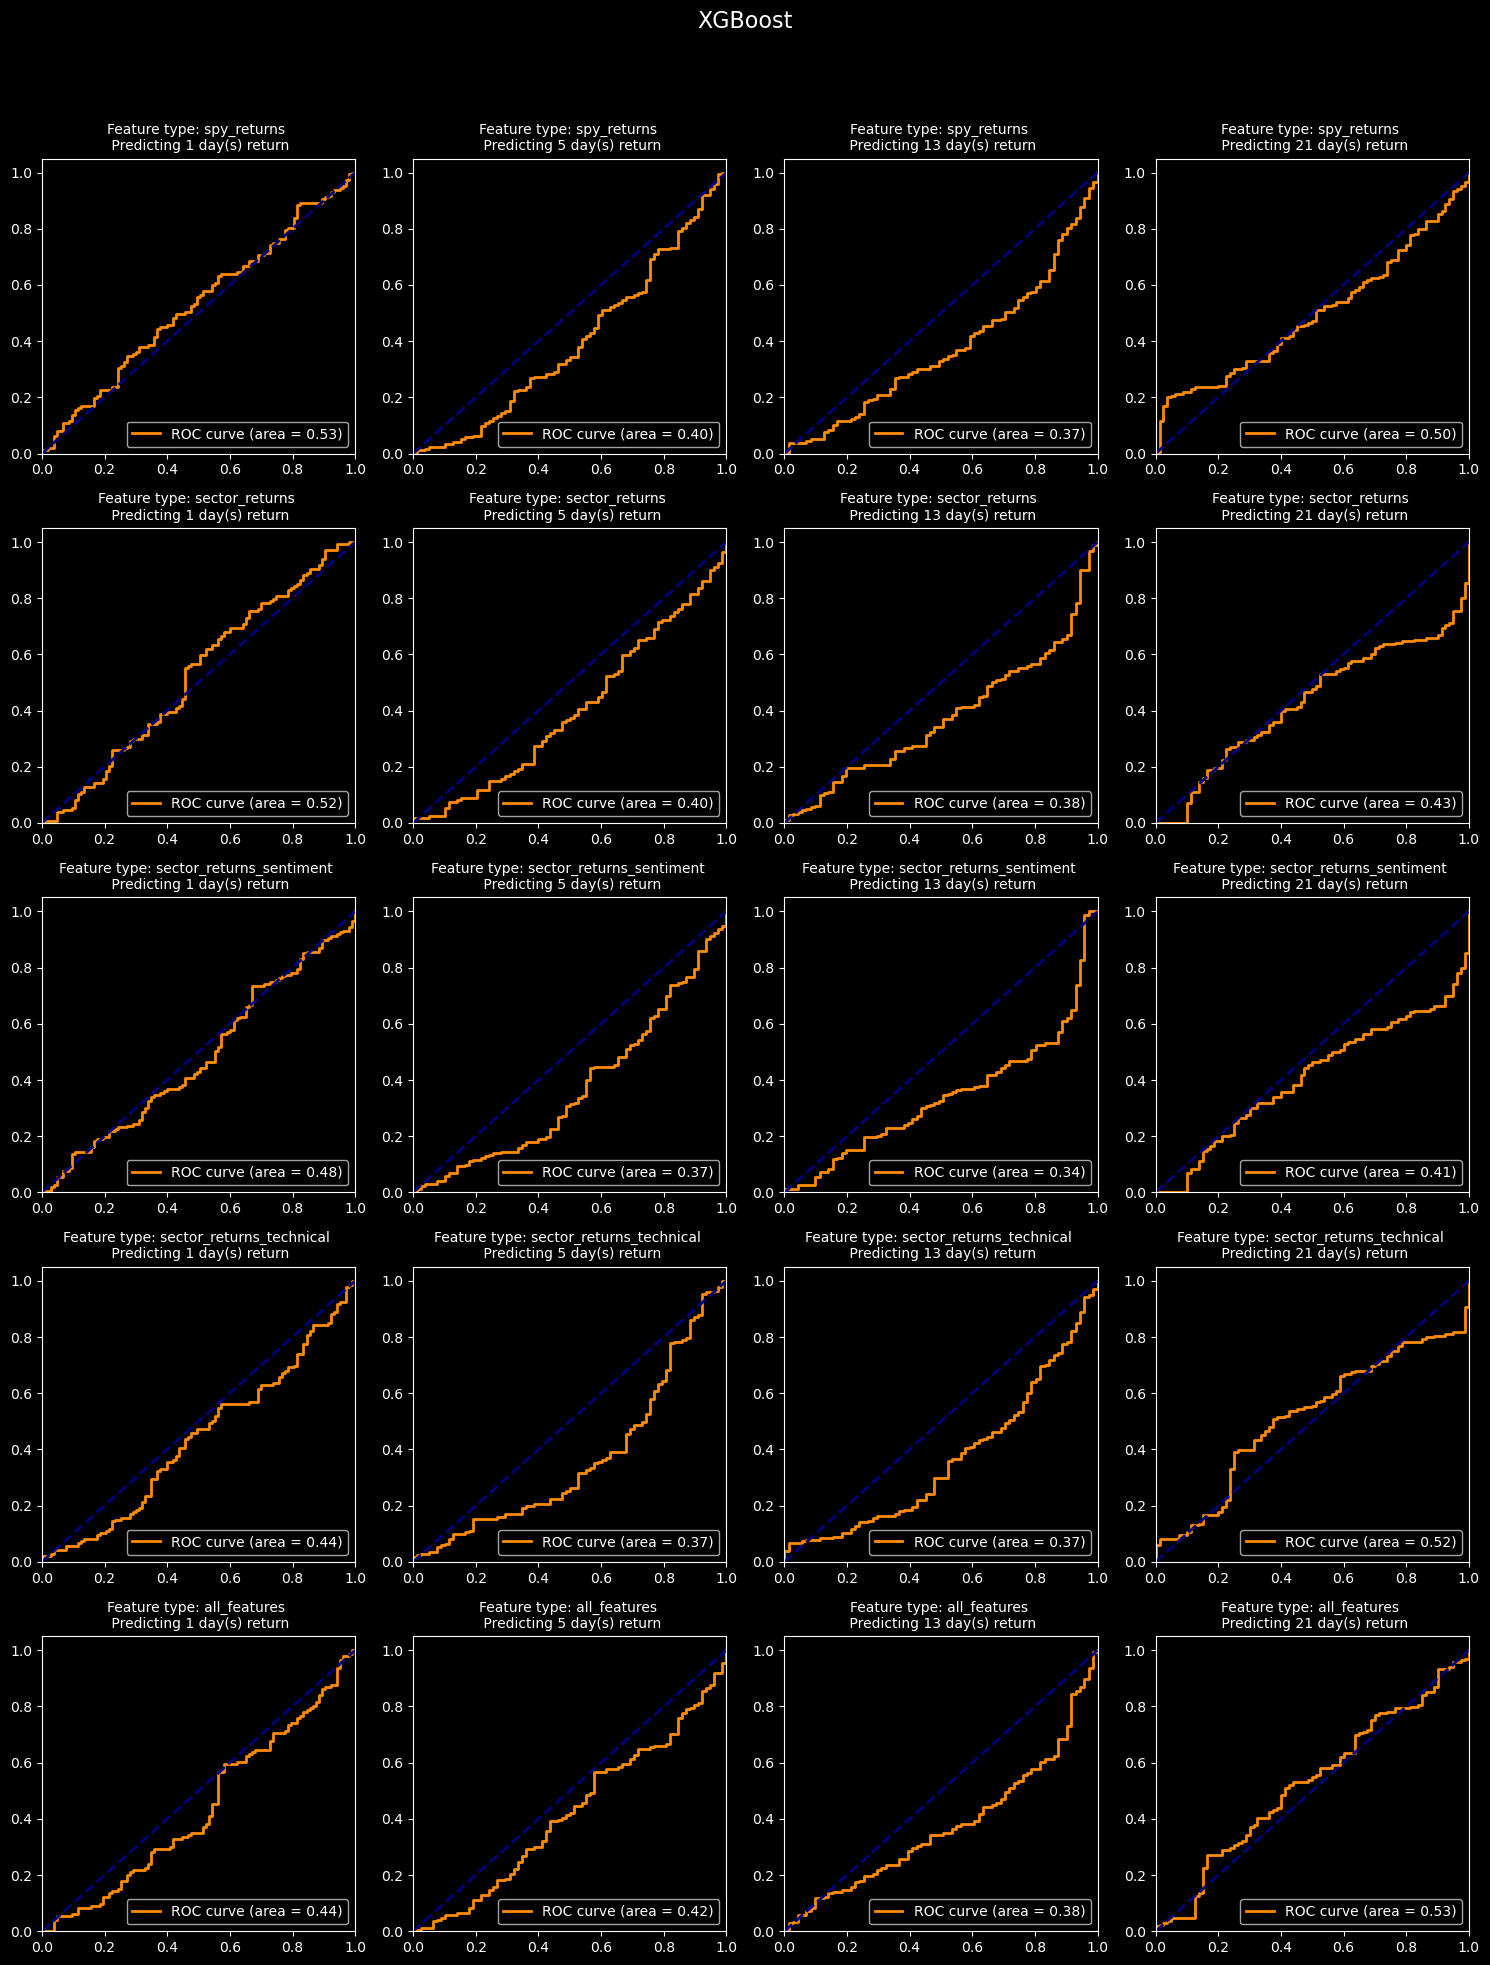

In [14]:
plot_all_roc(models_key["xgboost"], "XGBoost")